## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [10]:
print('x_train',x_train.shape[0])
print('y_train',y_train.shape)

x_train 60000
y_train (60000,)


In [12]:
print('x_test',x_test.shape[0])
print('y_test',y_test.shape)

x_test 10000
y_test (10000,)


### Find dimensions of an image in the dataset

In [13]:
print('x_train',x_train.shape)

x_train (60000, 28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
import keras

In [0]:
y_train=keras.utils.to_categorical(y_train, num_classes=10)

In [64]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
y_test=keras.utils.to_categorical(y_test, num_classes=10)

In [67]:
y_test.shape

(10000, 10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing the input
x_train /= 255
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
# input image dimensions
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [45]:
y_test.shape

(10000, 10)

### Import the necessary layers from keras to build the model

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [71]:
EPOCHS = 10
BATCH_SIZE=32
#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,name='conv_1'))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, (3, 3), activation='relu',name='conv_2'))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu',name='dense_1'))

num_classes = 10

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax',name='dense_2'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_8 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2359424   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________


In [72]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

# Train the model
model.fit(x_train, y_train, nb_epoch=EPOCHS, batch_size=BATCH_SIZE,
validation_data=(x_test, y_test), callbacks=callback_list, verbose=True)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.





Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 26s 426us/step - loss: 0.3706 - acc: 0.8662 - val_loss: 0.2909 - val_acc: 0.8912
Epoch 2/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.2292 - acc: 0.9162 - val_loss: 0.2499 - val_acc: 0.9083
Epoch 3/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.1652 - acc: 0.9386 - val_loss: 0.2502 - val_acc: 0.9140
Epoch 4/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.1149 - acc: 0.9571 - val_loss: 0.2526 - val_acc: 0.9175
Epoch 5/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0761 - acc: 0.9721 - val_loss: 0.2828 - val_acc: 0.9189
Epoch 6/10
60000/60000 [==============================] - 11s 177us/step - loss: 0.0491 - acc: 0.9822 - val_loss: 0.3392 - val_acc: 0.9130
Epoch 7/10
60000/60000 [==============================] - 11s 176us/step - loss: 0.0361 - acc: 0.9868 - val_

In [73]:
#Testing the model on test set
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 62us/step
Test loss: 0.5291201970778872
Test accuracy: 0.9149


### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [82]:
#Initialize the model
model1 = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,name='conv_1'))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model1.add(Conv2D(32, (3, 3), activation='relu',name='conv_2'))

#Add a MaxPooling Layer of size 2X2 
model1.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

#Flatten the layer
model1.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model1.add(Dense(128, activation='relu',name='dense_1'))

#Apply Dropout with 0.25 probability 
model1.add(Dropout(0.25,name='drop_1'))

num_classes = 10

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model1.add(Dense(num_classes, activation='softmax',name='dense_2'))

model1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 32)        9248      
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
drop_1 (Dropout)             (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)              

In [83]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
optimizer = Adam(lr=0.001)
#Set the loss function and optimizer for the model training
model1.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]# [stats, early_stopping]

# Train the model
model1.fit(x_train, y_train, nb_epoch=EPOCHS, batch_size=BATCH_SIZE,
validation_data=(x_test, y_test), callbacks=callback_list, verbose=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 185us/step - loss: 0.4147 - acc: 0.8514 - val_loss: 0.2989 - val_acc: 0.8902
Epoch 2/10
60000/60000 [==============================] - 11s 179us/step - loss: 0.2688 - acc: 0.9016 - val_loss: 0.2494 - val_acc: 0.9084
Epoch 3/10
60000/60000 [==============================] - 10s 175us/step - loss: 0.2235 - acc: 0.9192 - val_loss: 0.2445 - val_acc: 0.9086
Epoch 4/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.1875 - acc: 0.9311 - val_loss: 0.2304 - val_acc: 0.9195
Epoch 5/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.1581 - acc: 0.9414 - val_loss: 0.2305 - val_acc: 0.9176
Epoch 6/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.1357 - acc: 0.9488 - val_loss: 0.2570 - val_acc: 0.9146
Epoch 7/10
60000/60000 [==============================] - 10s 173us/step - loss: 0.1177 - acc: 0.9565 - val_loss: 0.

In [84]:
#Testing the model on test set
score = model1.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 61us/step
Test loss: 0.2868661679979414
Test accuracy: 0.9279


### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images
# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

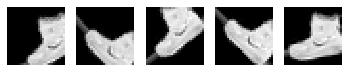

In [80]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [85]:
model1.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
  13/1875 [..............................] - ETA: 25s - loss: 3.8745 - acc: 0.2909

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 23s 13ms/step - loss: 1.0696 - acc: 0.6112 - val_loss: 0.4987 - val_acc: 0.8207
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.7792 - acc: 0.7135 - val_loss: 0.4583 - val_acc: 0.8326
Epoch 3/10
1875/1875 [==============================] - 23s 13ms/step - loss: 0.7031 - acc: 0.7386 - val_loss: 0.4486 - val_acc: 0.8374
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.6688 - acc: 0.7552 - val_loss: 0.4453 - val_acc: 0.8371
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.6283 - acc: 0.7684 - val_loss: 0.4470 - val_acc: 0.8408
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.6116 - acc: 0.7753 - val_loss: 0.4460 - val_acc: 0.8368
Epoch 7/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5946 - acc: 0.7825 - val_loss: 0.4402 - val_acc: 0.8401
Epoch 8/10
1875/1875 [==============================] - 23s

###  Report the final train and validation accuracy

In [86]:
#Testing the model on test set
score = model1.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 60us/step
Test loss: 0.44112555737495424
Test accuracy: 0.8447


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
import numpy as np
import keras

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10

In [99]:
%matplotlib inline
# Load/Prep the Data
(x_train, y_train_num), (x_test, y_test_num) = cifar10.load_data()

print('--- THE DATA ---')
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

--- THE DATA ---
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images


### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
datagen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

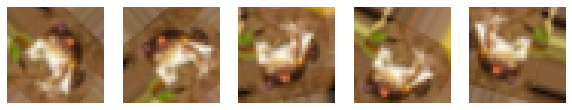

In [107]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
plt.figure(figsize=[10, 10])
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()